In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

## Clustering of CSV Files per Plate

In [7]:
import sys
sys.path.append('/Users/thorsten/code/ThorstenCodes/MorphoMind/')
from data_handling.params import LOCAL_DATA_PATH
platenr = '24585' #change Plate Number here
csv_file_path = os.path.join(LOCAL_DATA_PATH, f'{platenr}/raw/mean_well_profiles.csv')


In [8]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Preprocess the data: let's assume all columns except the first one (usually an ID or label column) are features
features = df.columns[1:]
X = df[features]


In [9]:
# Assuming the first column contains non-numeric data
numeric_data = df.select_dtypes(include=[np.number])

# Perform imputation on numeric data only
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Standardize the numeric data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

/Users/thorsten/.pyenv/versions/3.10.6/envs/MorphoMind/lib/python3.10/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Metadata_pert_id_vendor']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [10]:
n_clusters = 4  # This is an example, adjust based on your needs

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data_scaled)
#df['Cluster'] = kmeans.fit_predict(numeric_data_scaled)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


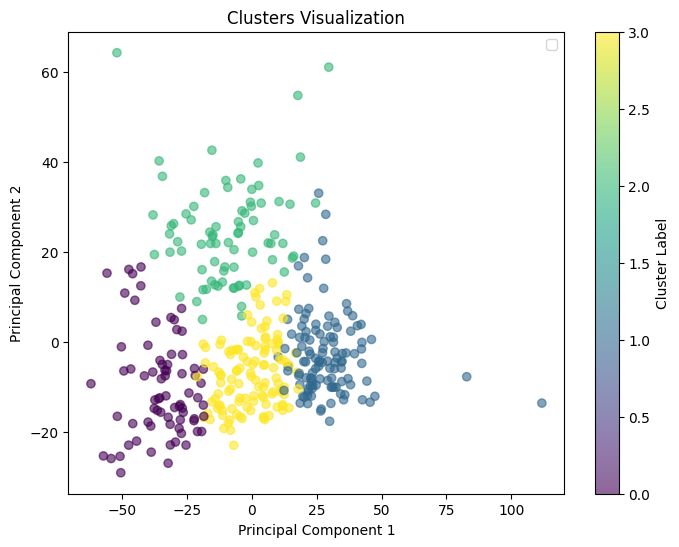

In [25]:
# Reduce the data to two principal components for visualization
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(numeric_data_scaled)

# # Plot the clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='tab10', marker='o', alpha=0.6)
# plt.title('Clusters Visualization')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster Label')
# plt.legend()
# plt.show()

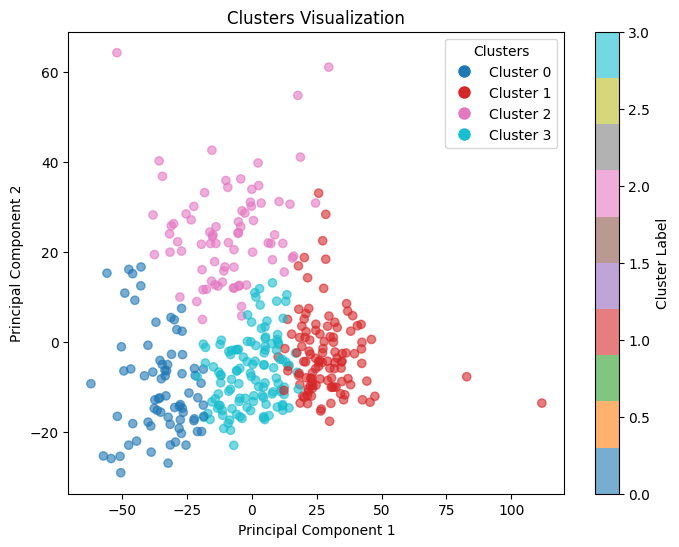

In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming numeric_data_scaled is defined and scaled appropriately
# Example: numeric_data_scaled = np.random.rand(100, 10) # Dummy data for illustration

n_clusters = 4  # Adjust based on your needs

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data_scaled)

# Reduce the data to two principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='tab10', marker='o', alpha=0.6)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a colorbar
plt.colorbar(scatter, label='Cluster Label')

# Create a legend
legend_labels = {i: f'Cluster {i}' for i in range(n_clusters)}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                             markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(n_clusters)]
plt.legend(handles=legend_handles, title="Clusters")

plt.show()


## Create New Processed_CSV folder with the Labels

In [12]:
#Specify the new file path for saving
new_csv_file_path = os.path.join(LOCAL_DATA_PATH, f'{platenr}/processed/{platenr}_wells_labeled.csv')

In [14]:
# Add the cluster labels to the DataFrame as a new column called 'Labels'
df['Labels'] = clusters

In [16]:
# Save the updated DataFrame to the new CSV file
df.to_csv(new_csv_file_path, index=False)  # Set index=False to avoid saving with an unnamed index column

In [29]:
df.head()

,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_ASSAY_WELL_ROLE,Metadata_broad_sample,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,Labels
0,24585,a01,24585,H-CBLB-004-4,a01,treated,BRD-K59220177-001-01-4,5.045535,DMSO,BRD-K59220177,...,1.954120,2.023087,1.987236,1.627801,1.642432,1.636588,2.061840,2.220474,2.240638,2
1,24585,a02,24585,H-CBLB-004-4,a02,treated,BRD-K59232212-001-01-6,4.985601,DMSO,BRD-K59232212,...,1.868034,1.862009,1.849992,1.597947,1.833780,1.740846,2.094620,2.260146,2.233745,2
2,24585,a03,24585,H-CBLB-004-4,a03,treated,BRD-K59324446-001-01-9,5.011545,DMSO,BRD-K59324446,...,1.586215,1.599778,1.588394,1.417259,1.512939,1.458388,2.077702,2.122583,2.154681,0
3,24585,a04,24585,H-CBLB-004-4,a04,treated,BRD-K59335919-001-01-3,5.022555,DMSO,BRD-K59335919,...,1.553503,1.639753,1.586223,1.641597,1.809969,1.755798,2.214992,2.253427,2.276576,2
4,24585,a05,24585,H-CBLB-004-4,a05,treated,BRD-K59385073-001-01-0,5.022509,DMSO,BRD-K59385073,...,2.248108,2.206940,2.233282,1.604172,1.834175,1.793110,2.119171,2.237498,2.266521,0


In [32]:
wells_with_label_2 = df[df['Labels'] == 2]['Metadata_Well']

# Converting to a list
wells_list = wells_with_label_2.tolist()
print(wells_list)

['a01', 'a02', 'a04', 'a08', 'a11', 'a22', 'b02', 'b03', 'b08', 'b09', 'b10', 'b20', 'c01', 'c03', 'c12', 'c21', 'd01', 'd03', 'd04', 'd07', 'd17', 'd20', 'e10', 'e12', 'e20', 'e22', 'f01', 'f13', 'f17', 'f21', 'g01', 'g02', 'g03', 'g14', 'g22', 'h01', 'h02', 'h03', 'h15', 'h21', 'h24', 'i01', 'i05', 'i20', 'j01', 'j02', 'j04', 'j06', 'j12', 'j16', 'j18', 'k17', 'l01', 'l06', 'l17', 'm01', 'm02', 'm05', 'm07', 'm15', 'm16', 'n01', 'n02', 'n07', 'n19', 'o01', 'o03', 'o08', 'o09', 'o10', 'o17', 'o22', 'p01', 'p02', 'p09', 'p20', 'p24']
